___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8



#### Мета: 

* навчитися використовувати моделі без учителем

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:
- зробіть описову статистику даного файлу
- ведіть топ-3 продукти, що продаються
- виведіть топ-2 пари продуктів, що продаються
- придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

**Import libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from collections import Counter
from apyori import apriori

In [110]:
df = pd.read_csv('groceries.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
1,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
# Drop first col and first row
df = df[1:]
df.drop(columns=0, inplace=True)

In [112]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,long life bakery product,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


In [113]:
df.shape

(9835, 32)

**Data Preprocessing**

In [114]:
# For Apriori we need to have list of lists 
# we also delete all NaN values
rows = df.shape[0]
cols = df.shape[1]
    
records = []
for i in range(rows):
    records.append([str(df.values[i,j]) for j in range(cols) if pd.notna(df.values[i,j])])

**Top 3 best-selling products / Топ-3 продукти, що продаються**

In [115]:
# Transform records(list of lists 2d) to flatten list(1d)
all_products = [item for sublist in records for item in sublist]

In [252]:
top_3 = Counter(all_products).most_common(3)
print("Top 3 best-selling product")
print("")
for i  in top_3:
    print(f"{i[1]}    {i[0]}")

Top 3 best-selling product

2513    whole milk
1903    other vegetables
1809    rolls/buns


**Top 2 best-selling product pairs / Топ-2 пари продуктів, що продаються**

In [234]:
from itertools import combinations
pairs = []

for i in records:
    if len(i)>1:
        pairs.append(list(combinations(i, 2)))

In [235]:
# Flatten list (pairs)
all_pairs = [item for sublist in pairs for item in sublist]

In [251]:
top_2_pairs = Counter(all_pairs).most_common(2)
print("Top 2 best-selling product pairs")
print("")
for i  in top_2_pairs:
    print(f"{i[1]}    {i[0][0]} & {i[0][1]}")

Top 2 best-selling product pairs

736    other vegetables & whole milk
557    whole milk & rolls/buns


**Applying Apriori**

In [257]:
# we use min_length=2 and max_length=2 to select anly pairs of products
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2, max_length=2)
association_results = list(association_rules)

In [203]:
print(len(association_results))

8


**Create list of association results**

In [263]:
res_list = []

for item in association_results:
    pair = item[0] 
    items = [x for x in pair]
    support = item[1]
    confidence = item[2][0][2]
    lift = item[2][0][3]
    temp = items, support, confidence, lift
    res_list.append(temp)

**Create DataFrame with assosiation results**

In [264]:
df_prod = pd.DataFrame(res_list, columns=['Rule', 'Support', 'Confidence', 'Lift'])
df_prod.sort_values(by='Confidence', ascending=False)

,Rule,Support,Confidence,Lift
6,"[root vegetables, herbs]",0.007016,0.431250,3.956477
3,"[liquor, bottled beer]",0.004677,0.422018,5.240594
1,"[root vegetables, beef]",0.017387,0.331395,3.040367
5,"[flour, sugar]",0.004982,0.286550,8.463112
7,"[sausage, sliced cheese]",0.007016,0.286307,3.047435
2,"[berries, whipped/sour cream]",0.009049,0.272171,3.796886
0,"[whipped/sour cream, baking powder]",0.004575,0.258621,3.607850
4,"[red/blush wine, bottled beer]",0.004881,0.253968,3.153760


In [270]:
# find association_rules for more than 2 products
association_rules1 = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results1 = list(association_rules1)

res_list1 = []

for item in association_results1:
    pair = item[0] 
    items = [x for x in pair]
    support = item[1]
    confidence = item[2][0][2]
    lift = item[2][0][3]
    temp = items, support, confidence, lift
    res_list1.append(temp)

In [274]:
df_prod1 = pd.DataFrame(res_list1, columns=['Rule', 'Support', 'Confidence', 'Lift'])
df_prod1.sort_values(by='Confidence', ascending=False)[:10]

,Rule,Support,Confidence,Lift
36,"[other vegetables, whipped/sour cream, pip fruit]",0.005592,0.604396,3.123610
18,"[other vegetables, chicken, yogurt]",0.004881,0.585366,3.025262
26,"[tropical fruit, curd, yogurt]",0.005287,0.514851,3.690645
16,"[butter, tropical fruit, yogurt]",0.004575,0.459184,3.291597
47,"[tropical fruit, whipped/sour cream, yogurt]",0.006202,0.448529,3.215224
62,"[rolls/buns, tropical fruit, whole milk, yogurt]",0.004881,0.444444,3.185941
28,"[curd, whipped/sour cream, yogurt]",0.004575,0.436893,3.131811
6,"[root vegetables, herbs]",0.007016,0.431250,3.956477
25,"[curd, root vegetables, yogurt]",0.004677,0.429907,3.081728
46,"[whole milk, sliced cheese, yogurt]",0.004575,0.424528,3.043175


**Висновки**

- Найпопулярніші товари, за кількістю продаж:
    - whole milk
    - other vegetables
    - rolls/buns

- Найпопулярніші пари товарів, за кількістю продаж:
    - other vegetables & whole milk
    - whole milk & rolls/buns

- За допомогою асоціативних правил було знайдено взаємозв'язок між парами 'root vegetables, beef', 'berries, whipped/sour cream', 'bottled beer, liquor', 'root vegetables, herbs', 'root vegetables, beef', 'flour, sugar'
- Якщо шукати асоціативні правила з високим рівнем довіри(confidence) для більше ніж 2х продуктів, можна побачити, що йогурт є присутній у більшості з них.
- Знайдену інформацію можна використати для збільшення прибутку, для контролю популярних товарів на складі, розташуванням продуктів в магазині.
- Товар A i B можна помістити разом, щоб, коли клієнт купує один із товарів, йому не потрібно було далеко йти, щоб купити інший.
- На ці продукти можуть бути запропоновані спільні знижки, якщо клієнт купує їх разом.
- Можна підвищити рекламу на обрані пари товарів.

### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
 
- Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
- Опишіть отримані результати

**Load dataset**

In [3]:
df2 = pd.read_csv('Mall_Customers.csv')
df2 = df2.rename(columns = {'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace = False)
df2.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df2.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Check null values and dublicates**

In [5]:
df2.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [6]:
df2.duplicated().sum()

0

In [7]:
# for further analysis we don't need CustomerID column 
df2.drop(columns= "CustomerID", inplace=True)

**EDA**

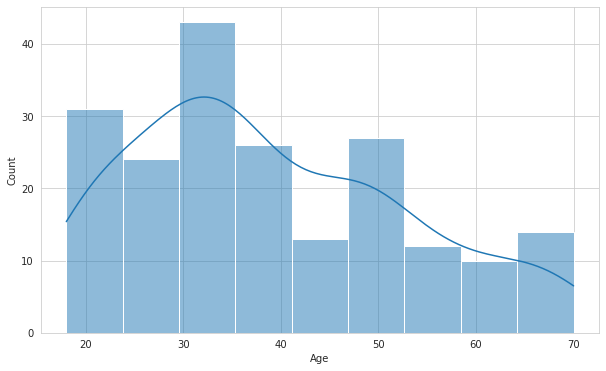

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data=df2, x=df2['Age'], kde=True);

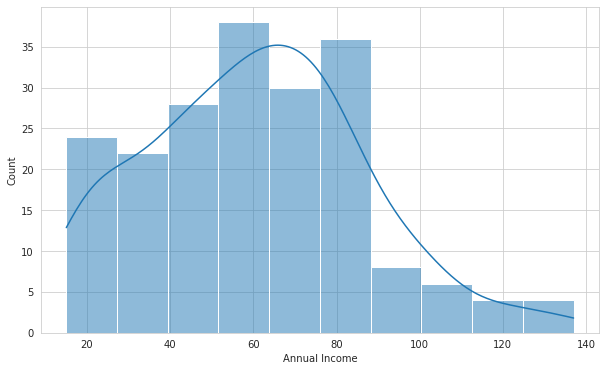

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data=df2, x=df2['Annual Income'], kde=True);

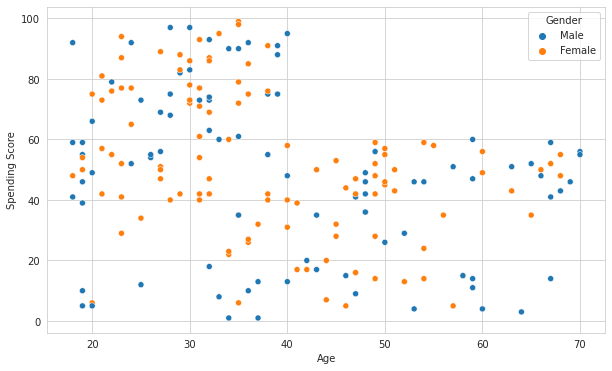

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df2['Age'], y=df2['Spending Score'], hue=df2['Gender']);

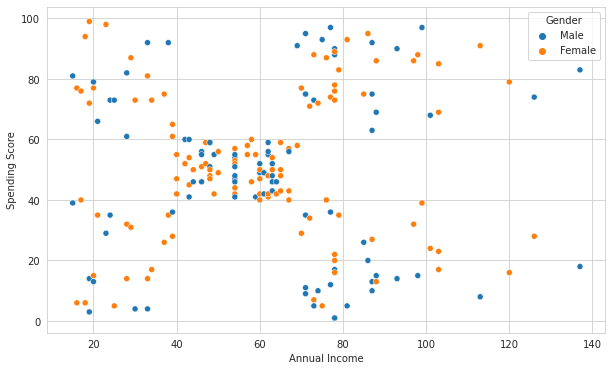

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x =df2['Annual Income'], y=df2['Spending Score'], hue = df2["Gender"]);

- Більшість відвідувачів є віком 30-35 років та мають середній дохід
- Покупці до 40 років схильні більше витрачати, спостерігається від'ємна кореляція між віком та spending score
- На графіку з співвідношення доходи та витрати, можна побачити 5 груп

**KMeans**

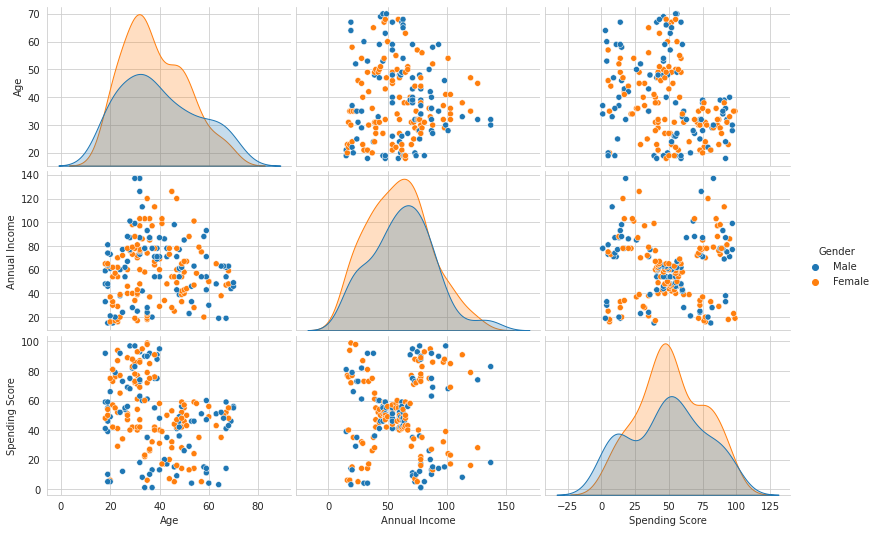

In [16]:
# Let's see our data in a detailed way with pairplot
# Drop gender column for X set
X = df2.drop(['Gender'], axis=1)
sns.pairplot(df2, hue='Gender', aspect=1.5)
plt.show()

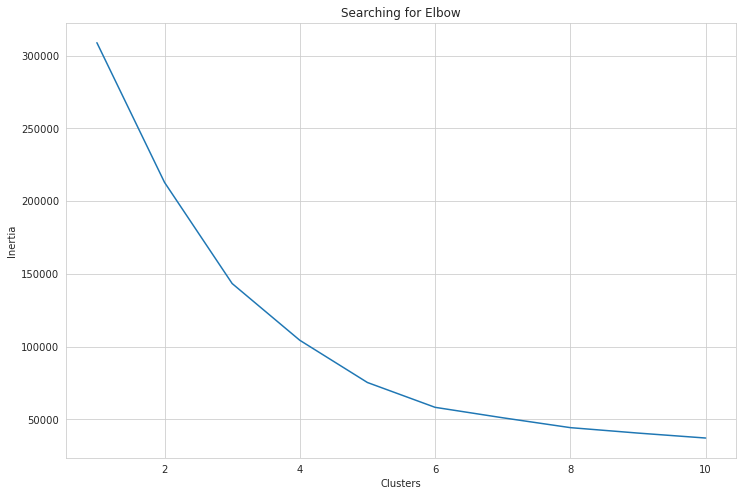

In [20]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

There is 2 posssible elbow poits: 3 and 5

Yellowbrick's KElbowVisualizer implements the “elbow” method of selecting the optimal number of clusters by fitting the K-Means model with a range of values for  K . 

If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.

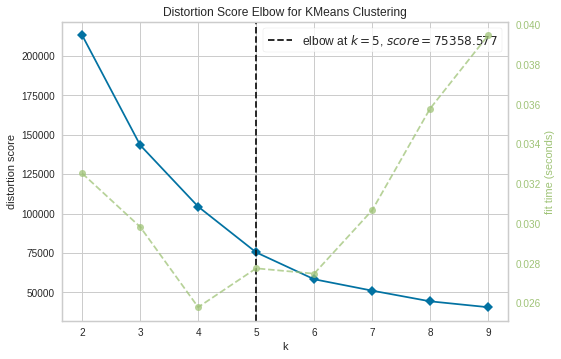

In [40]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.poof();

/home/nastia/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


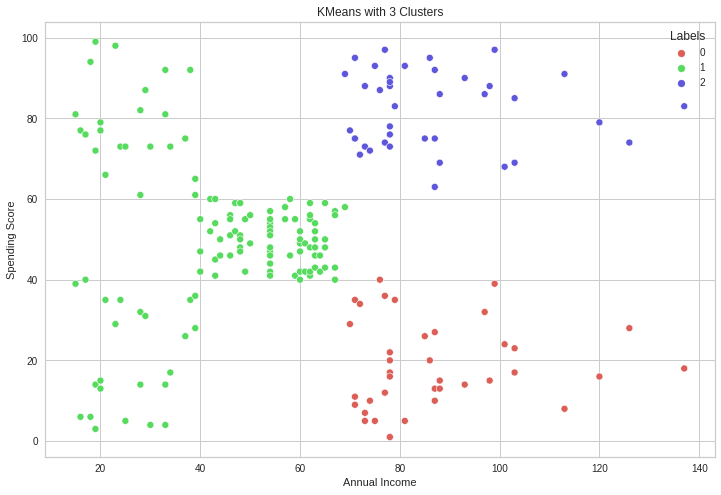

In [41]:
# 5 Clusters
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income'], X['Spending Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

/home/nastia/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


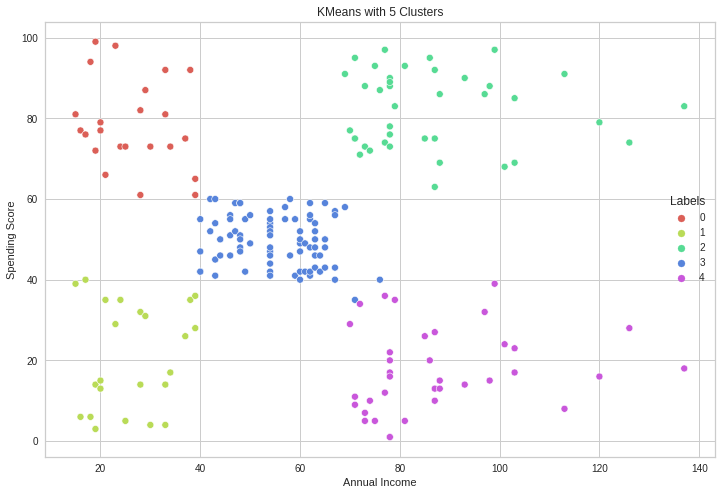

In [48]:
# 5 Clusters
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income'], X['Spending Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

In [59]:
X.groupby('Labels').mean()

,Age,Annual Income,Spending Score
Labels,,,
0,25.521739,26.304348,78.565217
1,45.217391,26.304348,20.913043
2,32.692308,86.538462,82.128205
3,43.088608,55.291139,49.569620
4,40.666667,87.750000,17.583333


In [80]:
X.groupby('Labels')['Age'].count()

Labels
0    23
1    23
2    39
3    79
4    36
Name: Age, dtype: int64

Використання моделі K-mean дозволило виділити 5 груп клієнтів

Інтерпретація моделі

- Кластер 1 (червоний колір)-> низький дохід, але високі витрати, середній вік - 25. Такі люди вважають за краще витрачати більше, ніж заробляють. Ймовірно, що вони беруть кредити щоб оплатити заборгованість.
<br>

- Кластер 2 (світло зелений колір)-> низький рівень доходу та витрат, середній вік - 45. Дана  група людей надаватиме перевагу дешевим товарам, вигідним пропозиціям.
<br>

- Кластер 3 (зелений колір)-> високий рівень доходу та витрат, середній вік - 32. Покупці з цієї групи схильні до покупок дорогих/елітних речей
<br>

- Кластер 4 (синій колір)-> середній рівень доходу та витрат, середній вік - 43. Найбільша група людей. Цільова група для товару середнього сегменту.
<br>

- Кластер 5 (червоний колір)-> високий дохід, але низькі витрати, середній вік - 40. Ця група є нашою цільовою аудиторією, і для неї необхідно розробити спеціальні стратегії.
